In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import sklearn.model_selection as sms
import sklearn.linear_model as slm

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
true_value = pd.read_csv("gender_submission.csv")

In [33]:
train.columns
#["Cabin","Age","Survived","Name","Ticket","PassengerId"]
columns = ["Pclass:2", "Pclass:3", "Fare_scaled", "Embarked:C", "Embarked:Q", "Sex:male", "SibSp", "Parch"]

In [34]:
train.drop(train[train["Embarked"].isna()].index,inplace=True)

In [35]:
x_train = train.drop(["Cabin","Age","Survived","Name","Ticket","PassengerId","Fare","Pclass","Embarked"], axis=1)


x_train["Embarked:C"] = train[train["Embarked"] == "C"]["Embarked"]
x_train["Embarked:C"].replace("C",1,inplace=True)
x_train["Embarked:C"].fillna(0,inplace=True)


x_train["Embarked:Q"] = train[train["Embarked"] == "Q"]["Embarked"]
x_train["Embarked:Q"].replace("Q",1,inplace=True)
x_train["Embarked:Q"].fillna(0,inplace=True)


x_train["Sex"].replace("male",1,inplace=True)
x_train["Sex"].replace("female",0,inplace=True)
x_train["Sex:male"]=x_train["Sex"]
x_train.drop(columns=["Sex"],axis=1,inplace=True)


x_train["Pclass:2"]=train["Pclass"]
x_train["Pclass:2"].replace(3,0,inplace=True)
x_train["Pclass:2"].replace(2,1,inplace=True)
x_train["Pclass:2"].replace(1,0,inplace=True)


x_train["Pclass:3"]=train["Pclass"]
x_train["Pclass:3"].replace(3,1,inplace=True)
x_train["Pclass:3"].replace(2,0,inplace=True)
x_train["Pclass:3"].replace(1,0,inplace=True)


scaler = StandardScaler()
x_train["Fare_scaled"]= scaler.fit_transform(train["Fare"].values.reshape(-1,1))

x_train=x_train[columns]
x_train.head()

,Pclass:2,Pclass:3,Fare_scaled,Embarked:C,Embarked:Q,Sex:male,SibSp,Parch
0,0,0,-0.500240,0.0,0.0,1,1,0
1,0,0,0.788947,1.0,0.0,0,1,0
2,0,0,-0.486650,0.0,0.0,0,0,0
3,0,0,0.422861,0.0,0.0,0,1,0
4,0,0,-0.484133,0.0,0.0,1,0,0


In [36]:
y_train= train["Survived"]

In [37]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [38]:
x_test = test.drop(["Cabin","Age","Name","Ticket","PassengerId","Fare","Pclass","Embarked"], axis=1)


x_test["Embarked:C"] = test[test["Embarked"] == "C"]["Embarked"]
x_test["Embarked:C"].replace("C",1,inplace=True)
x_test["Embarked:C"].fillna(0,inplace=True)


x_test["Embarked:Q"] = test[test["Embarked"] == "Q"]["Embarked"]
x_test["Embarked:Q"].replace("Q",1,inplace=True)
x_test["Embarked:Q"].fillna(0,inplace=True)


x_test["Sex"].replace("male",1,inplace=True)
x_test["Sex"].replace("female",0,inplace=True)
x_test["Sex:male"]=x_test["Sex"]
x_test.drop(columns=["Sex"],axis=1,inplace=True)

x_test["Pclass:2"]=test["Pclass"]
x_test["Pclass:2"].replace(3,0,inplace=True)
x_test["Pclass:2"].replace(2,1,inplace=True)
x_test["Pclass:2"].replace(1,0,inplace=True)


x_test["Pclass:3"]=test["Pclass"]
x_test["Pclass:3"].replace(3,1,inplace=True)
x_test["Pclass:3"].replace(2,0,inplace=True)
x_test["Pclass:3"].replace(1,0,inplace=True)

scaler = StandardScaler()
x_test["Fare_scaled"]= scaler.fit_transform(test["Fare"].values.reshape(-1,1))
x_test=x_test[columns]

x_test.head()


,Pclass:2,Pclass:3,Fare_scaled,Embarked:C,Embarked:Q,Sex:male,SibSp,Parch
0,0,0,-0.498407,0.0,1.0,1,0,0
1,0,0,-0.513274,0.0,0.0,0,1,0
2,0,0,-0.465088,0.0,1.0,1,0,0
3,0,0,-0.483466,0.0,0.0,1,0,0
4,0,0,-0.418471,0.0,0.0,0,1,1


In [39]:
y_test = true_value["Survived"]

<h1>Classfication</h1>

In [40]:
LR = slm.LogisticRegression()
result = LR.fit(x_train,y_train)
pred = LR.predict(x_test)
mse = np.mean((pred-y_test)**2)
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)
#############################################################
print("=======================================================")
#############################################################
pred = LR.predict(x_train)
accuracy = metrics.accuracy_score(y_train, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_train, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_train, pred)
recall = metrics.recall_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)

Accuracy: 0.9712918660287081
Confusion Matrix:
[[258   8]
 [  4 148]]
Precision: 0.9487179487179487
Recall: 0.9736842105263158
F1-score: 0.9610389610389611
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')
Accuracy: 0.7896512935883014
Confusion Matrix:
[[472  77]
 [110 230]]
Precision: 0.749185667752443
Recall: 0.6764705882352942
F1-score: 0.7109737248840803
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')


In [41]:
LR = slm.LogisticRegression()
result = LR.fit(x_train.drop(columns=["Embarked:C", "Embarked:Q"]),y_train)
pred = LR.predict(x_test.drop(columns=["Embarked:C", "Embarked:Q"]))
mse = np.mean((pred-y_test)**2)
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)
#############################################################
print("=======================================================")
#############################################################
pred = LR.predict(x_train.drop(columns=["Embarked:C", "Embarked:Q"]))
accuracy = metrics.accuracy_score(y_train, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_train, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_train, pred)
recall = metrics.recall_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)

Accuracy: 0.9760765550239234
Confusion Matrix:
[[260   6]
 [  4 148]]
Precision: 0.961038961038961
Recall: 0.9736842105263158
F1-score: 0.9673202614379085
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')
Accuracy: 0.7896512935883014
Confusion Matrix:
[[472  77]
 [110 230]]
Precision: 0.749185667752443
Recall: 0.6764705882352942
F1-score: 0.7109737248840803
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')


In [42]:
LR = slm.LogisticRegression()
result = LR.fit(x_train.drop(columns=["Embarked:C", "Embarked:Q", "SibSp", "Parch"]),y_train)
pred = LR.predict(x_test.drop(columns=["Embarked:C", "Embarked:Q", "SibSp", "Parch"]))
mse = np.mean((pred-y_test)**2)
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)
#############################################################
print("=======================================================")
#############################################################
pred = LR.predict(x_train.drop(columns=["Embarked:C", "Embarked:Q", "SibSp", "Parch"]))
accuracy = metrics.accuracy_score(y_train, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_train, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_train, pred)
recall = metrics.recall_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)

Accuracy: 0.9856459330143541
Confusion Matrix:
[[260   6]
 [  0 152]]
Precision: 0.9620253164556962
Recall: 1.0
F1-score: 0.9806451612903226
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')
Accuracy: 0.78177727784027
Confusion Matrix:
[[462  87]
 [107 233]]
Precision: 0.728125
Recall: 0.6852941176470588
F1-score: 0.706060606060606
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')


In [49]:
LR = slm.LogisticRegression()
LR.fit(x_train.drop(columns=["Embarked:C", "Embarked:Q", "Fare_scaled", "SibSp", "Parch"]), y_train)

#################################################################
pred = LR.predict(x_test.drop(columns=["Embarked:C", "Embarked:Q", "Fare_scaled", "SibSp", "Parch"]))

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = metrics.f1_score(y_test, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)
#############################################################
print("=======================================================")
#############################################################
pred = LR.predict(x_train.drop(columns=["Embarked:C", "Embarked:Q", "Fare_scaled", "SibSp", "Parch"]))
accuracy = metrics.accuracy_score(y_train, pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_train, pred)
print("Confusion Matrix:")
print(cm)
precision = metrics.precision_score(y_train, pred)
recall = metrics.recall_score(y_train, pred)
f1 = metrics.f1_score(y_train, pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(x_test.columns)

Accuracy: 1.0
Confusion Matrix:
[[266   0]
 [  0 152]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')
Accuracy: 0.7862767154105736
Confusion Matrix:
[[468  81]
 [109 231]]
Precision: 0.7403846153846154
Recall: 0.6794117647058824
F1-score: 0.7085889570552146
Index(['Pclass:2', 'Pclass:3', 'Fare_scaled', 'Embarked:C', 'Embarked:Q',
       'Sex:male', 'SibSp', 'Parch'],
      dtype='object')


<Axes: xlabel='Pclass', ylabel='Count'>

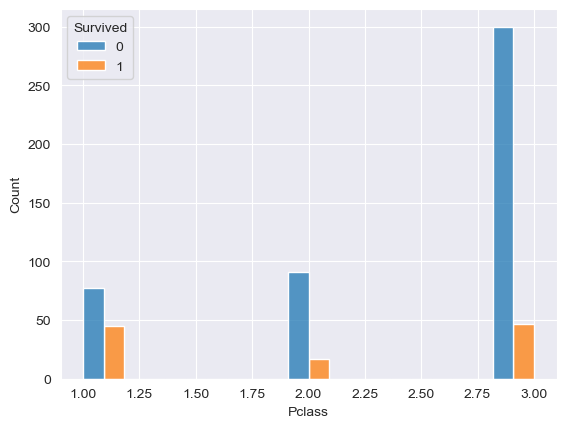

In [44]:
sns.histplot(data=train[train["Sex"] == "male"],x="Pclass",hue="Survived",multiple="dodge")

<Axes: xlabel='Pclass', ylabel='Count'>

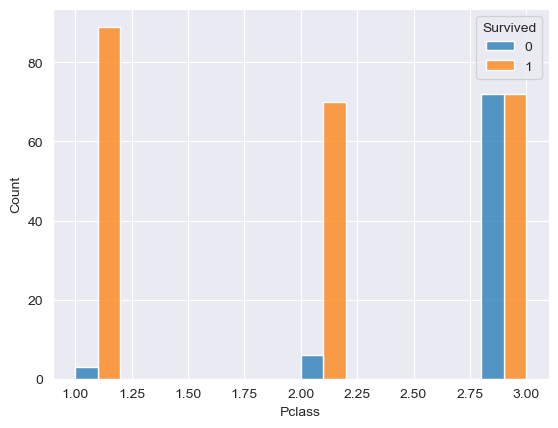

In [45]:
sns.histplot(data=train[train["Sex"] == "female"],x="Pclass",hue="Survived",multiple="dodge")